In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

#Load road shapefile 
road_data = gpd.read_file('nz-roads-road-section-geometry.shx')

# Load the Christchurch ward map shapefile
wellington_boundary  = gpd.read_file('TLA_Boundaries.shx')


road_data.head()

,geometry
0,"LINESTRING (1748050.917 5431494.273, 1748061.3..."
1,"LINESTRING (1753567.138 5438592.389, 1753581.1..."
2,"LINESTRING (1753591.559 5439033.021, 1753606.4..."
3,"LINESTRING (1753135.047 5439161.601, 1753121.6..."
4,"LINESTRING (1748212.965 5431526.247, 1748209.7..."


In [2]:
# Check the CRS of the crash data
#print(crash_data.crs)
print(road_data.crs)
print(wellington_boundary.crs)

None
None


In [3]:
# Assign the NZTM2000 CRS to the crash data
#crash_data.crs = 'EPSG:2193'

# Assign the NZTM2000 CRS to the crash data
road_data.crs = 'EPSG:2193'

# Assign the NZTM2000 CRS to the crash data
wellington_boundary.crs = 'EPSG:2193'

In [4]:
# Check the CRS of the crash data
#print(crash_data.crs)
print(wellington_boundary.crs)
print(road_data.crs)

EPSG:2193
EPSG:2193


In [5]:
# Clip the crash data to the Christchurch wards
#crash_data_wellington = gpd.clip(crash_data, wellington_boundary)

In [6]:
road_data_wellington = gpd.clip(road_data, wellington_boundary)

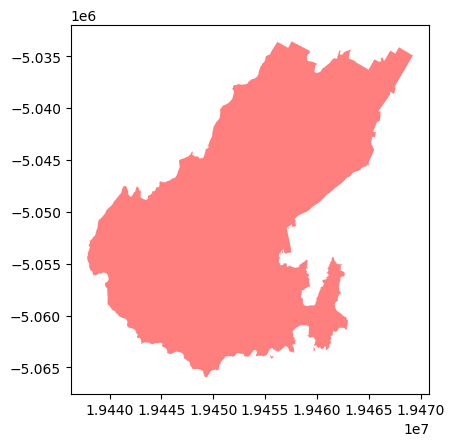

In [7]:
import matplotlib.pyplot as plt

# Plot the Wellington boundary
wellington_boundary.plot(color='red', ax=plt.gca(), alpha=0.5)

plt.show()

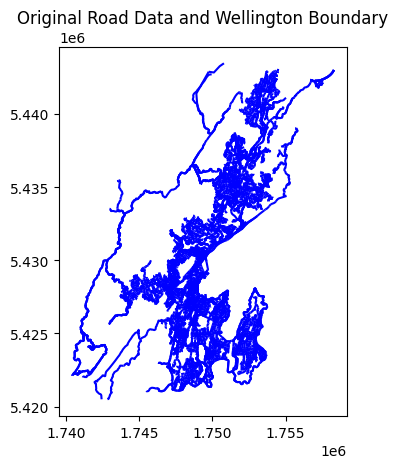

In [8]:
# Plot the original road data
road_data.plot(color='blue', ax=plt.gca())
plt.title('Original Road Data and Wellington Boundary')

plt.show()

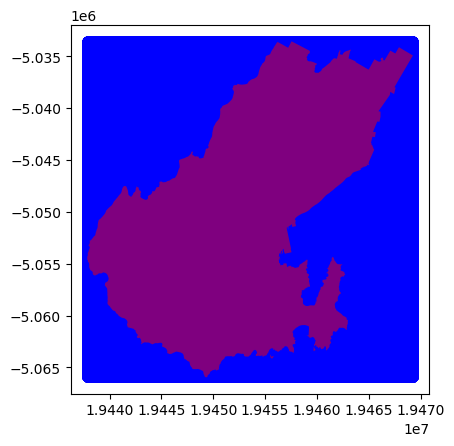

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming wellington_boundary is a GeoPandas GeoDataFrame
min_x, min_y, max_x, max_y = wellington_boundary.total_bounds

# Define the grid size (5x5 meters)
grid_size = 5

# Calculate the number of grid cells in each direction
num_x_cells = int((max_x - min_x) / grid_size)
num_y_cells = int((max_y - min_y) / grid_size)

# Create the grid
x = np.linspace(min_x, max_x, num_x_cells + 1)
y = np.linspace(min_y, max_y, num_y_cells + 1)
xx, yy = np.meshgrid(x, y)

# Plot the grid
plt.scatter(xx.ravel(), yy.ravel(), color='blue', alpha=0.5)
wellington_boundary.plot(color='red', ax=plt.gca(), alpha=0.5)

plt.show()

In [34]:
import pandas as pd

# Load the CSV file
cas_data = pd.read_csv('Crash_Analysis_System_(CAS)_data.csv')

# Print the first few rows of the data
cas_data.head()

,X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,...,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
0,1.561971e+06,5.176725e+06,66388959,NaN,587702.0,0.0,NaN,0.0,1.0,NaN,...,NaN,NaN,0.0,0.0,Urban,1.0,NaN,NaN,Fine,Null
1,1.756263e+06,5.927631e+06,66388960,NaN,507900.0,0.0,NaN,1.0,0.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
2,1.755375e+06,5.912110e+06,66388961,NaN,518701.0,0.0,NaN,0.0,2.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
3,1.760027e+06,5.436020e+06,66388962,NaN,569100.0,0.0,NaN,0.0,2.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Light rain,Null
4,2.032005e+06,5.708227e+06,66388963,NaN,544002.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,Open,1.0,NaN,NaN,Light rain,Null


In [35]:
# Print the first few rows of the filtered data
cas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853454 entries, 0 to 853453
Data columns (total 72 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   X                          853454 non-null  float64
 1   Y                          853454 non-null  float64
 2   OBJECTID                   853454 non-null  int64  
 3   advisorySpeed              32848 non-null   float64
 4   areaUnitID                 853450 non-null  float64
 5   bicycle                    853449 non-null  float64
 6   bridge                     348975 non-null  float64
 7   bus                        853449 non-null  float64
 8   carStationWagon            853449 non-null  float64
 9   cliffBank                  348975 non-null  float64
 10  crashDirectionDescription  853454 non-null  object 
 11  crashFinancialYear         853454 non-null  object 
 12  crashLocation1             853454 non-null  object 
 13  crashLocation2             85

In [38]:
wel = df[df.region == "Wellington Region"]
wel.crashSeverity.value_counts()

crashSeverity
Non-Injury Crash    60602
Minor Crash         17649
Serious Crash        3980
Fatal Crash           408
Name: count, dtype: int64

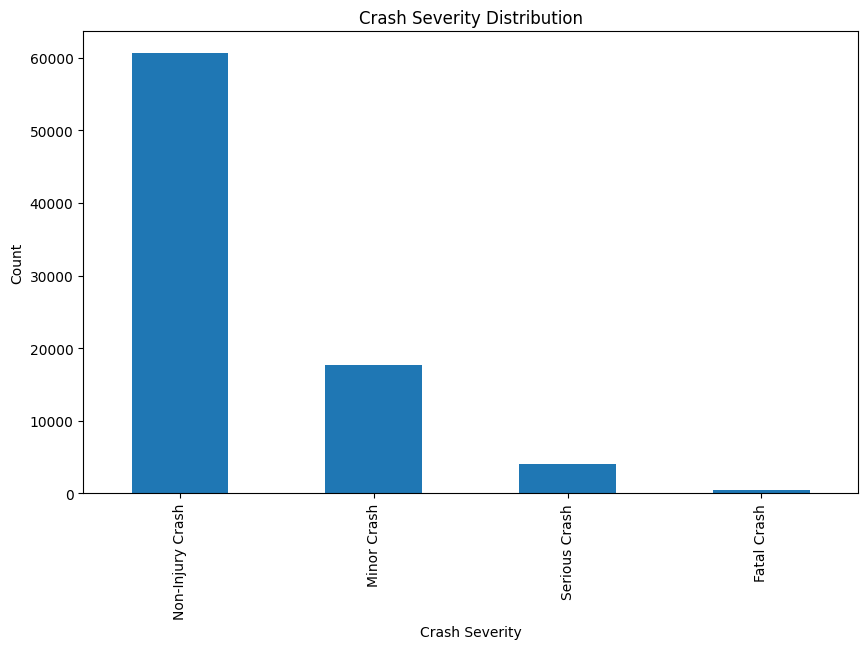

In [41]:
import matplotlib.pyplot as plt

# Assuming 'crashSeverity' is a column in your filtered_cas_data DataFrame
severity_counts = wel['crashSeverity'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
severity_counts.plot(kind='bar')
plt.title('Crash Severity Distribution')
plt.xlabel('Crash Severity')
plt.ylabel('Count')
plt.show()

In [ ]:
import geopandas as gpd

cas_data_gdf = gpd.read_file('Crash_Analysis_System_(CAS)_data.csv', geometry=gpd.points_from_xy(cas_data.X, cas_data.Y))

# Set the CRS to EPSG 2193
cas_data_gdf.crs = 'EPSG:2193'

In [ ]:
cas_data_gdf.head()

In [ ]:
# Filter the GeoDataFrame to only include rows where the region is 'Wellington Region'
wellington_region_gdf = cas_data_gdf.loc[cas_data_gdf['Region'] == 'Wellington Region']